# Aufgabe 3.3

By

- Javier Carrasco Melo
- Fariza Sabit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [ ]:
class Optimizer:

    def __init__(self, name):
        
        self.name = name
    
    def pred_y(self, X, pred_factors):
        
        y_hat = np.dot(X, pred_factors)
        
        return y_hat
        
    def solve_ne(self, X, y):     
        
        A = np.dot(X.T, X)
        w = np.dot(np.linalg.inv(A), np.dot(X.T, y)) 
        
        return w
        
    def fit_function(self, X, y_values, lambda_ = 1):
        '''
        By default lambda_ = 1
        Output: weights
        '''
        
        # to solve normal equation, X.T.dot(X) has to be invertible
        if np.linalg.det(X.T.dot(X)) != 0:
            w = self.solve_ne(X, y_values)
        
        else:  # if not, we need regularization
            I = np.identity(X.shape[-1])
            A = np.linalg.inv(np.dot(X.T, X) + lambda_ * I)
            w = np.dot(A, np.dot(X.T, y_values))
        
        return w
    
    def gradient_descent(self, X, w, y, tol=0.001, learning_rate=0.0001, it = 1000):
        
        gradients = self.compute_gradients(X, w, y)
        i = 0
        
        while np.linalg.norm(gradients) > tol and i < it:
            gradients = self.compute_gradients(X, w, y)
            w = w - learning_rate * gradients
            i += 1
            
        return w
        
    def compute_gradients(self, X, w, y):
        
        grad_f = X.T.dot(np.dot(X, w) - y)/len(X)
        
        return grad_f

def get_X(x_values, deg=1):
    '''
    creates a matrix X with deg+1 columns
    '''
    X = np.zeros((len(x_values), deg+1))
    for i in range(deg+1):
        X[:, i] = x_values[:, 0]**i
        
    return X


In [ ]:
files = {"fkt_1.txt": 0.01, 
         "fkt_2.txt": 0.0001, 
         "fkt_3.txt": 0.000001, 
         "fkt_4.txt": 0.00000001, 
         "fkt_5.txt": 0.00000001}
         # values stand for a learning rate depending on the degree of the function

def plot_model(file, method='NE'):
    
    # prepare data
    data = np.loadtxt(file, usecols=range(2))
    degree = int(file[4])
    x = data[:, 0]
    y = data[:, 1]
    x.shape = (len(x), 1)
    y.shape = (len(y), 1)
    X = get_X(x, degree)
    
    opt = Optimizer(method)
    
    if(method == 'NE'):
        w = opt.fit_function(X, y)
    elif(method == 'GD'):
        w = np.random.rand(int(file[4])+1, 1)  # initialize random weights
        w = opt.gradient_descent(X, w, y, learning_rate = files[file])
    else:
        print("Expected 'NE' or 'GD'")
        return
        
    y_hat = opt.pred_y(X, w)
        
    plt.scatter(x, y, label='True value', c='g')  
    plt.plot(x, y_hat, label='Predicted value', c='b')
    plt.legend(loc=1)
    
    plt.show()

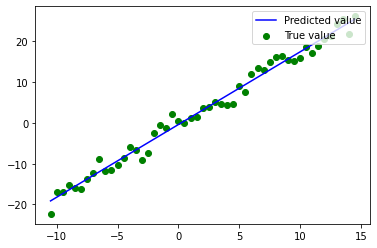

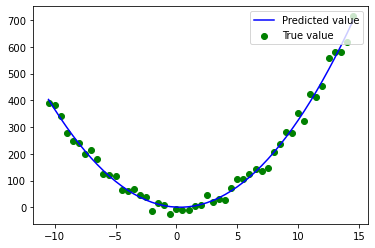

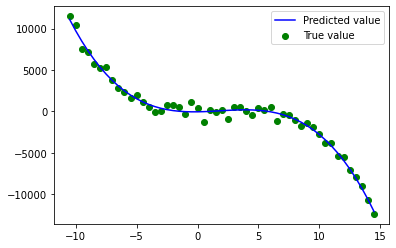

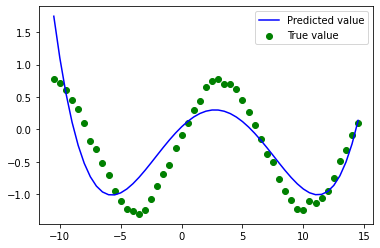

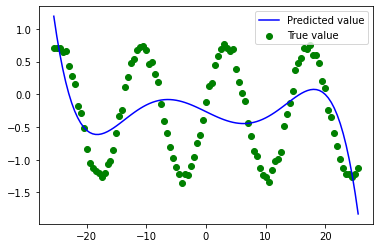

In [ ]:
for file in files:
    plot_model(file)

Given our data, the normal equation approximates well up to the cubic function, but it is not approximating well for higher degrees. The model is underfitting in the last two plots for 4th and 5th degree functions.

Now we are going to try gradient descent.

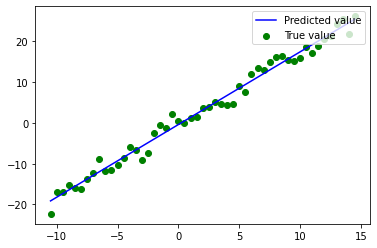

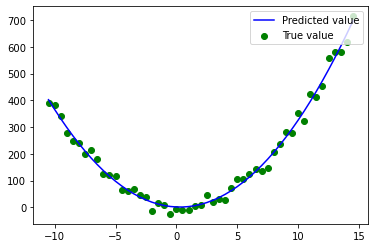

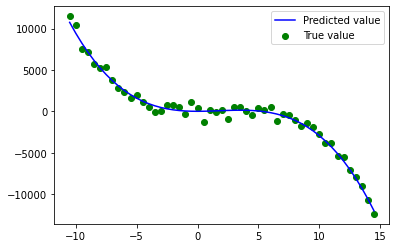

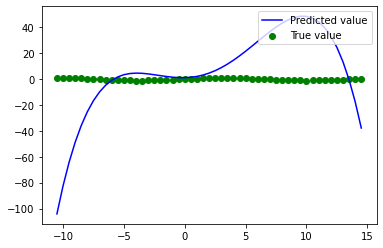

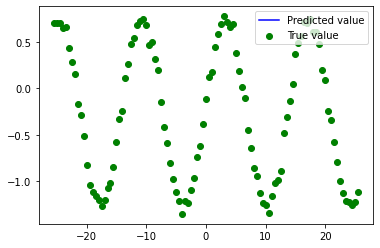

In [ ]:
for file in files:
    plot_model(file, method = 'GD')

Notice that the higher degree, the smaller learning rates. We did this to get better fits than using the same learning rate for each dataset. For the 4th and 5th degree functions the Gradient Descent could not make better predictions than with Normal Equation method. Notice that there are no predicted values for the last datafile because it requires even smaller `(<1e-7)` learning rate and more iterations.  

# Aufgabe 3.4
Diese Aufgabe soll mit Stift und Papier gelöst werden.

# Aufgabe 3.5

Based on Weekly assignment 6, Matthias' solution and [Pythonprogramming.net](https://pythonprogramming.net/training-deep-learning-neural-network-pytorch/)

In [ ]:
import csv
with open("wg_data.csv", 'r') as f:
    wg_data = list(csv.reader(f))
import numpy as np
wg_data = np.array(wg_data[1:], dtype=np.float)

| Größe (m^2) |  Ort             | Art              | Preis|
|:--------    |:----------------:|:----------------:|-----:|
| 27	      | Leipzig Zentrum  | 1-Zimmer-Wohnung | 466  |

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [ ]:
# Setze Seed für Reproduzierbarkeit:
torch.manual_seed(1)

# Import data
import csv
with open("wg_data.csv", 'r') as f:
    wg_data = list(csv.reader(f))
import numpy as np
wg_data = np.array(wg_data[1:], dtype=np.float)
X_data = wg_data[:, :-1]
y_data = wg_data[:, -1]

# split into train and val datasets
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3, shuffle=True, random_state=123)

# cast numpy objects into tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True)
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=5, shuffle=True)

class FullyConnectedNet(nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super().__init__()
        self.input_layer = nn.Linear(n_features, n_hidden)
        self.hidden_layer_1 = nn.Linear(n_hidden, n_hidden)
        self.hidden_layer_2 = nn.Linear(n_hidden, n_hidden)
        self.output_layer = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.elu(self.input_layer(x))
        x = F.leaky_relu(self.hidden_layer_1(x))
        x = F.elu(self.hidden_layer_2(x))
        x = self.output_layer(x)
        return x.view(-1)

In [ ]:
learning_rate = 0.0001
momentum = 0.85
num_epochs = 100

In [ ]:
# create object
model = FullyConnectedNet(n_features=3, n_hidden=128, n_output=1)
print(model)

# Definiere einen Optimierer:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Definiere die Loss-Funktion:
loss_func = torch.nn.L1Loss()   # Alternative torch.nn.MSELoss()

FullyConnectedNet(
  (input_layer): Linear(in_features=3, out_features=128, bias=True)
  (hidden_layer_1): Linear(in_features=128, out_features=128, bias=True)
  (hidden_layer_2): Linear(in_features=128, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
for epoch in range(num_epochs):
    phase_loss = {"train": 0.0,
                  "val": 0.0
                  }
    
    # Jede Epoche besteht aus einer Trainingsphase, gefolgt von einer Validierungsphase
    for phase in ["train", "val"]:
        if phase == 'train':
            # Setze das Model auf Trainingsmodus und wähle den Trainingsdataloader
            model.train()
            dataloader = train_dataloader
        else:
            # Setze das Model auf Evaluierungsmodus und wähle den Validierungsdataloader
            model.eval()
            dataloader = val_dataloader


        for iter_num, (X, y) in enumerate(dataloader):
            """
            Nimm die nächste Batch "X" und übergib sie dem Modell.
            Das Modell berechnet dann für alle Werte in der Batch eine Ausgabe "prediction"
            """
            prediction = model(X)
            
            # Wende die Fehlerfunktion an
            loss = loss_func(prediction, y)

            # Lösche alle bisherigen Gradienten
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                # Berechne die Gradienten mittels Backpropagation
                loss.backward()
                
                # Update die Gewichte
                optimizer.step()
            
            """
            Sowohl für das Training als auch für die Validierung soll ein Loss berechnet werden, dass alle Losses
            einer Phase akkumuliert. Implementieren Sie das akkumulierte Loss.
            Hinweis 1: Normierte Losses sind in der Regel aussagekräftiger.
            Hinweis 2: Berücksichtigen Sie bei der Normierung die Batchgröße.
            """
            phase_loss[phase] += (loss.item() / X.size()[0])
            
    print(epoch+1, "of " + str(num_epochs) + ":\t\tTrain Loss:", round(phase_loss["train"],4), "  \t  Val Loss:", round(phase_loss["val"],4))

1 of 100:		Train Loss: 771.6986   	  Val Loss: 503.155
2 of 100:		Train Loss: 765.0833   	  Val Loss: 467.0282
3 of 100:		Train Loss: 793.8356   	  Val Loss: 565.8553
4 of 100:		Train Loss: 1237.9182   	  Val Loss: 473.5924
5 of 100:		Train Loss: 729.1488   	  Val Loss: 492.1022
6 of 100:		Train Loss: 433.6518   	  Val Loss: 142.3457
7 of 100:		Train Loss: 141.5417   	  Val Loss: 89.6436
8 of 100:		Train Loss: 209.2962   	  Val Loss: 102.7859
9 of 100:		Train Loss: 168.7381   	  Val Loss: 102.8415
10 of 100:		Train Loss: 171.2438   	  Val Loss: 111.4073
11 of 100:		Train Loss: 389.6443   	  Val Loss: 162.6112
12 of 100:		Train Loss: 193.8701   	  Val Loss: 237.6101
13 of 100:		Train Loss: 276.2002   	  Val Loss: 117.1641
14 of 100:		Train Loss: 178.313   	  Val Loss: 109.9938
15 of 100:		Train Loss: 294.3921   	  Val Loss: 106.7813
16 of 100:		Train Loss: 123.6704   	  Val Loss: 144.84
17 of 100:		Train Loss: 150.6666   	  Val Loss: 83.3349
18 of 100:		Train Loss: 121.5212   	  Val Los

In [ ]:
import pandas as pd

# Prepare data for plot
orte = {X_data[i][1] for i in range(len(X_data))}
x_for_plot = []
predictions = []
targets = []

with torch.no_grad():
    for x, y in val_dataset:
        pred_y = model(x)
        
        x_for_plot.append(x)
        predictions.append(pred_y)
        targets.append(y)

# create a dataframe with all our data for the plot
plot_data = pd.DataFrame([x.numpy() for x in x_for_plot], columns=['sqm', 'ort', 'art'])
plot_data['preis'] = targets[0].numpy()
plot_data['prediction'] = [x[0].item() for x in predictions]

In [ ]:
plot_data.head()

,sqm,ort,art,preis,prediction
0,20.0,6.0,2.0,270.0,296.161652
1,13.0,1.0,4.0,270.0,274.691437
2,11.0,0.0,2.0,270.0,247.978012
3,14.0,7.0,2.0,270.0,243.103683
4,20.0,2.0,2.0,270.0,317.822815


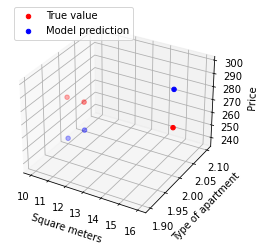

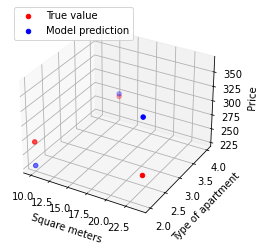

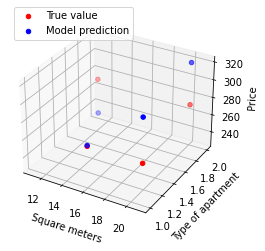

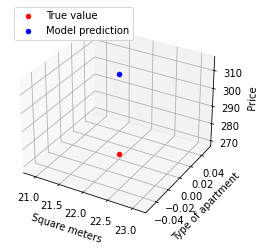

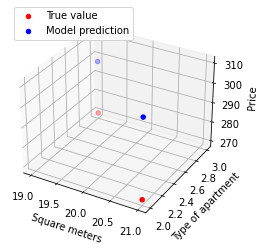

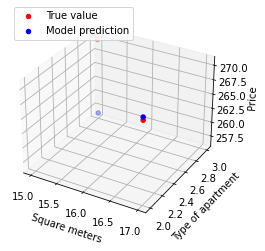

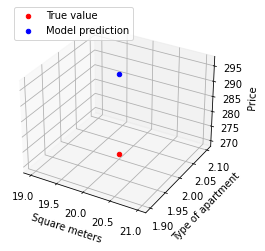

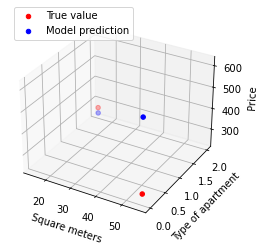

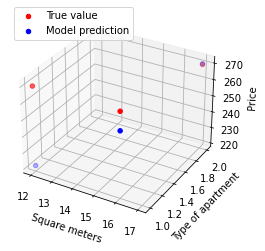

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_epoch_result(ort):
    ort_data = plot_data.loc[plot_data['ort']==ort, :]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(ort_data['sqm'], ort_data['art'], ort_data['preis'], label="True value", c='r', marker='o')
    ax.scatter(ort_data['sqm'], ort_data['art'], ort_data['prediction'], label="Model prediction", c='b', marker='o')

    ax.legend(loc=(0.03, 0.86))
    ax.set_xlabel('Square meters')
    ax.set_ylabel('Type of apartment')
    ax.set_zlabel('Price')

for ort in orte:
    plot_epoch_result(ort)

## Fragen beantworten

### 1. Wie gut schätzen Sie Ihr trainiertes Modell für zukünftige neue Wohnungen ein? 

- Not very accurate compared to a model we could train with thousands of datapoints. However, this model can give an idea of the price to rent an apartment in Leipzig, because the predictions of the model typically fall within a 10-15% range of the true value.

### 2. Nennen Sie einige Verbesserungsvorschläge für ein besseres Modell.

- We could included more data. With a large dataset we could create a test dataset (besides our training and validation ones) to evaluate the performance of our model with new data. That would increase the accuracy of our model.

- We could include data for different cities (not only Leipzig).

- We could consider the inclusion of more features. For example, we think that whether the aparment is furnished or not could have an impact on price.

- We could make changes to the model's hyperparameters, like number of hidden layers, learning rate, momentum, activation functions, and so on.